In [2]:
import pandas as pd

In [3]:
!ls ../../datasets/

elo_rating.csv				 fifa_world_cup_2022
elo_rating_preprocessed.csv		 international_football_results
fifa_ranking_before_wc.csv		 predictions
fifa_ranking_before_wc_preprocessed.csv


## Mixing datasets

Vamos investigar porque dois datasets não tem todos os jogos em comum por uma margem grande.

### Fifa World Cup 

[Dataset do Kaggle](https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022) da usuária `brenda89`. Na descrição do dataset, uma das fontes é o outro dataset que vamos analisar aqui.

In [18]:
df_fifa = pd.read_csv('../../datasets/fifa_world_cup_2022/fifa_world_cup_2022.csv')
df_fifa['date'] = pd.to_datetime(df_fifa['date'])
df_fifa.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [11]:
# partidas

df_fifa.shape

(23921, 25)

In [12]:
# número de times distintos 

l = list(df_fifa.home_team) + list(df_fifa.away_team)
len(set(l))

211

In [20]:
df_fifa.date.min(), df_fifa.date.max()

(Timestamp('1993-08-08 00:00:00'), Timestamp('2022-06-14 00:00:00'))

In [24]:
df_fifa.tournament.nunique()

82

## International Football Results

O outro dataset também é do [Kaggle](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017).

In [49]:
df_inter = pd.read_csv('../../datasets/international_football_results/results.csv')
df_inter['date'] = pd.to_datetime(df_inter['date'])
df_inter['year'] = df_inter.date.dt.year
df_inter.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876


In [30]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44152 entries, 0 to 44151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44152 non-null  datetime64[ns]
 1   home_team   44152 non-null  object        
 2   away_team   44152 non-null  object        
 3   home_score  44104 non-null  float64       
 4   away_score  44104 non-null  float64       
 5   tournament  44152 non-null  object        
 6   city        44152 non-null  object        
 7   country     44152 non-null  object        
 8   neutral     44152 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.7+ MB


In [62]:
df_inter.shape

(44152, 10)

In [45]:
df_inter.shape[0] / df_fifa.shape[0] - 1

0.8457422348564023

In [32]:
# número de times distintos 

l = list(df_inter.home_team) + list(df_inter.away_team)
len(set(l))

316

In [33]:
df_inter.tournament.nunique()

139

In [34]:
df_inter.date.min(), df_inter.date.max()

(Timestamp('1872-11-30 00:00:00'), Timestamp('2022-12-02 00:00:00'))

In [99]:
# jogos no mesmo período

df_inter[(df_inter.date >= df_fifa.date.min())].shape
print(df_inter[(df_inter.date < df_fifa.date.min())].shape)

(18257, 11)


In [50]:
# jogos no mesmo período

df_inter_same = df_inter[(df_inter.date >= df_fifa.date.min()) & (df_inter.date <= df_fifa.date.max())]
df_inter_same.shape

(25659, 10)

In [51]:
df_inter_same.shape[0] - df_fifa.shape[0]

1738

In [52]:
df_inter_same.shape[0] / df_fifa.shape[0] -1

0.07265582542535842

<AxesSubplot: xlabel='date'>

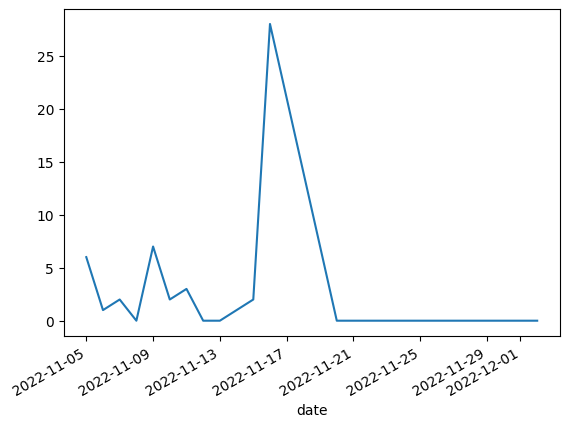

In [56]:
df_inter[df_inter.date > '2022-11-01'].groupby('date')['home_score'].sum().plot()

In [57]:
# filtrar só jogos com resultados

df_inter2 = df_inter[~df_inter.home_score.isnull()]
df_inter2.shape

(44104, 10)

In [58]:
# jogos no mesmo período

df_inter_same2 = df_inter2[(df_inter2.date >= df_fifa.date.min()) & (df_inter2.date <= df_fifa.date.max())]
df_inter_same2.shape

(25659, 10)

## Achar diferenças

In [59]:
df_inter.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876


In [60]:
df_fifa.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_inter['key'] = df_inter.apply(lambda x: str(x.date) + '/' + x.home_team + '/' + x.away_team, axis=1)
df_inter

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,key
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,1872-11-30 00:00:00/Scotland/England
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,1873-03-08 00:00:00/England/Scotland
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,1874-03-07 00:00:00/Scotland/England
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,1875-03-06 00:00:00/England/Scotland
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,1876-03-04 00:00:00/Scotland/England
...,...,...,...,...,...,...,...,...,...,...,...
44147,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True,2022,2022-12-01 00:00:00/Canada/Morocco
44148,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True,2022,2022-12-02 00:00:00/Serbia/Switzerland
44149,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True,2022,2022-12-02 00:00:00/Cameroon/Brazil
44150,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True,2022,2022-12-02 00:00:00/Ghana/Uruguay


In [87]:
df_fifa['key'] = df_fifa.apply(lambda x: str(x.date) + '/' + x.home_team + '/' + x.away_team, axis=1)
df_fifa

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,key
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-08 00:00:00/Bolivia/Uruguay
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-08 00:00:00/Brazil/Mexico
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-08 00:00:00/Ecuador/Venezuela
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-08 00:00:00/Guinea/Sierra Leone
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-08 00:00:00/Paraguay/Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 00:00:00/Moldova/Andorra
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 00:00:00/Liechtenstein/Latvia
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,2022-06-14 00:00:00/Chile/Ghana
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0,2022-06-14 00:00:00/Japan/Tunisia


In [93]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44152 entries, 0 to 44151
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44152 non-null  datetime64[ns]
 1   home_team   44152 non-null  object        
 2   away_team   44152 non-null  object        
 3   home_score  44104 non-null  float64       
 4   away_score  44104 non-null  float64       
 5   tournament  44152 non-null  object        
 6   city        44152 non-null  object        
 7   country     44152 non-null  object        
 8   neutral     44152 non-null  bool          
 9   year        44152 non-null  int64         
 10  key         44152 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [97]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [95]:
df_diff = (
    df_inter[['date', 'home_team', 'away_team', 'key']]
    .merge(df_fifa[['date', 'home_team', 'away_team', 'key']], on='key', how='left')
)

In [98]:
df_diff[~df_diff.date_y.isnull()]

,date_x,home_team_x,away_team_x,key,date_y,home_team_y,away_team_y
18257,1993-08-08,Bolivia,Uruguay,1993-08-08 00:00:00/Bolivia/Uruguay,1993-08-08,Bolivia,Uruguay
18258,1993-08-08,Brazil,Mexico,1993-08-08 00:00:00/Brazil/Mexico,1993-08-08,Brazil,Mexico
18259,1993-08-08,Ecuador,Venezuela,1993-08-08 00:00:00/Ecuador/Venezuela,1993-08-08,Ecuador,Venezuela
18260,1993-08-08,Guinea,Sierra Leone,1993-08-08 00:00:00/Guinea/Sierra Leone,1993-08-08,Guinea,Sierra Leone
18261,1993-08-08,Paraguay,Argentina,1993-08-08 00:00:00/Paraguay/Argentina,1993-08-08,Paraguay,Argentina
...,...,...,...,...,...,...,...
43910,2022-06-14,Turkey,Lithuania,2022-06-14 00:00:00/Turkey/Lithuania,2022-06-14,Turkey,Lithuania
43911,2022-06-14,Moldova,Andorra,2022-06-14 00:00:00/Moldova/Andorra,2022-06-14,Moldova,Andorra
43912,2022-06-14,Liechtenstein,Latvia,2022-06-14 00:00:00/Liechtenstein/Latvia,2022-06-14,Liechtenstein,Latvia
43913,2022-06-14,Chile,Ghana,2022-06-14 00:00:00/Chile/Ghana,2022-06-14,Chile,Ghana


## Conclusão

Os dados diferentes são em sua maioria anteriores a 1993. Como são antigos, são menos úteis, mas poderiam ajudar a modelar melhor a relação de time A versus time B nas condições neutras e por torneio. Talvez, se combinarmos isso com pesos por tempo na métrica de avaliação, nosso modelo melhore.